## Definitions

- Strike Price: This is the price at which our option is exercised at
- Underlying: This refers to the asset (which could really be anything which has a price) which underlies the derivative contract.
- ITM (In-the-money): An option is ITM if it is currently “worth” exercising today i.e. for a call option the current underlying’s price is greater than the strike price (and vice versa for a put).
- OTM (Out-of-the-money): An option is OTM if it is currently “not worth” exercising today.
- ATM (At-the-money): An option is ATM if it is neither ITM or OTM, i.e. exercising today would have no tangible effect (ignoring any transaction costs/option premiums).

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import stats

### European Option w/ GBM

In [87]:
nsims = 20000
nsteps = 252 # 1 year
expiry = 1
(timestep, dt) = np.linspace(0, expiry, nsteps+1, retstep=True)

# strike price
X0 = 100

In [88]:
# model parameters
mu = 0
sigma = 0.2

In [89]:
# ABM
dX = mu*dt + sigma*np.random.randn(nsims, nsteps) * dt ** 0.5
# or add 1 to dX and cumprod
gbm = np.concatenate([np.zeros([1, nsims]), np.cumprod(1+dX,1).T])
k = X0 * gbm
# Expected Value
EcdX = X0 * np.exp(timestep*mu)

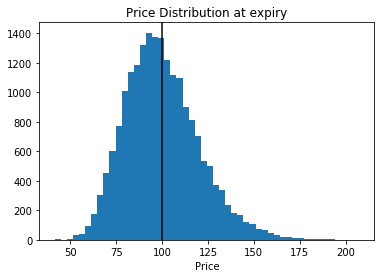

In [90]:
plt.hist(k[-1, :], bins=50)
plt.axvline(EcdX[-1], color='k')
plt.xlabel('Price')
plt.title('Price Distribution at expiry')
plt.show()

In [93]:
# Zero out all OTM outcomes
p = (k[-1,:]-X0)*((k[-1,:]-X0)>0)
np.mean(p)

7.930555718481437